In [3]:
from __future__ import division

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

cali_housing = fetch_california_housing()

X = cali_housing.data
y = cali_housing.target

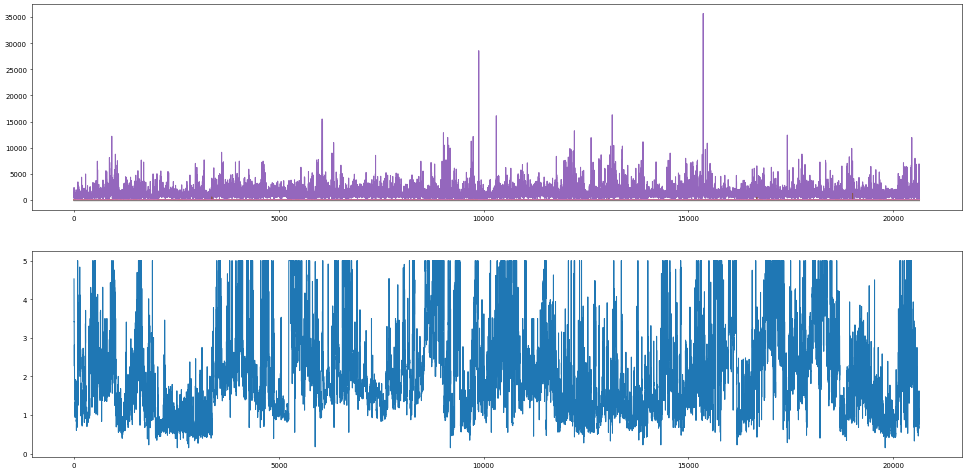

In [4]:
plt.figure(figsize=(24, 12), dpi=50)

plt.subplot(2, 1, 1)
plt.plot(X)

plt.subplot(2, 1, 2)
plt.plot(y)


In [10]:
from sklearn.model_selection import train_test_split

bins = np.arange(6)
binned_y = np.digitize(y, bins)

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
 
from sklearn.model_selection import GridSearchCV

X_train_prin, X_test_prin, y_train_prin, y_test_prin = train_test_split(X, y,test_size=0.2,stratify=binned_y)

binned_y_train_prin = np.digitize(y_train_prin, bins)
X_1, X_stack, y_1, y_stack = train_test_split(X_train_prin, y_train_prin,test_size=0.33,stratify=binned_y_train_prin )

In [11]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import RandomizedSearchCV

param_dist = {
 'max_samples': [0.5,1.0],
 'max_features' : [0.5,1.0],
 'oob_score' : [True, False],
 'base_estimator__n_neighbors': [3,5],
 'n_estimators': [100]
 }

single_estimator = KNeighborsRegressor()
ensemble_estimator = BaggingRegressor(base_estimator = single_estimator)

pre_gs_inst_bag = RandomizedSearchCV(ensemble_estimator,
 param_distributions = param_dist,
 cv=3,
 n_iter = 5,
 n_jobs=-1)

pre_gs_inst_bag.fit(X_1, y_1)

RandomizedSearchCV(cv=3,
                   estimator=BaggingRegressor(base_estimator=KNeighborsRegressor()),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'base_estimator__n_neighbors': [3, 5],
                                        'max_features': [0.5, 1.0],
                                        'max_samples': [0.5, 1.0],
                                        'n_estimators': [100],
                                        'oob_score': [True, False]})

In [13]:
pre_gs_inst_bag.best_params_

{'oob_score': True,
 'n_estimators': 100,
 'max_samples': 1.0,
 'max_features': 0.5,
 'base_estimator__n_neighbors': 3}

In [14]:
rs_bag = BaggingRegressor(**{'max_features': 0.5,
 'max_samples': 1.0,
 'n_estimators': 100,
 'oob_score': False, 
 'base_estimator': KNeighborsRegressor(n_neighbors=3)})

rs_bag.fit(X_1, y_1)

BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=3),
                 max_features=0.5, n_estimators=100)

In [15]:
tmp = rs_bag.predict(X_test_prin)

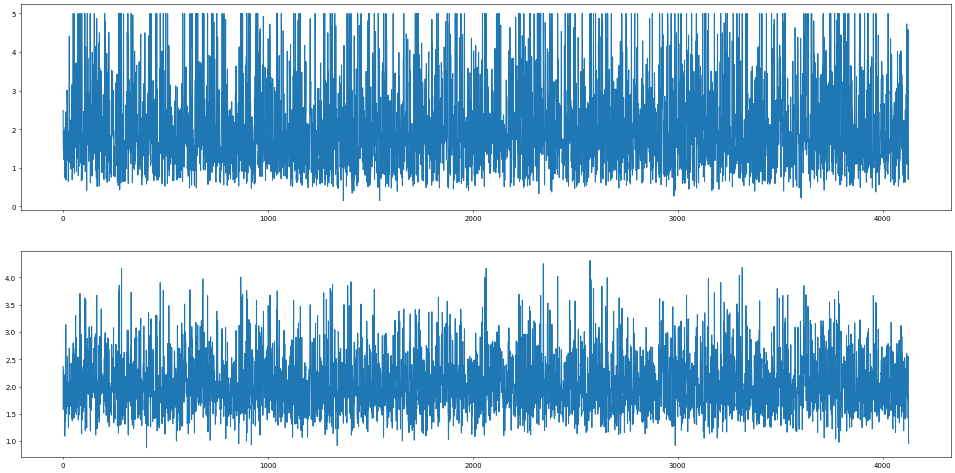

In [17]:
plt.figure(figsize=(24, 12), dpi=50)

plt.subplot(2, 1, 1)
plt.plot(y_test_prin)

plt.subplot(2, 1, 2)
plt.plot(tmp)